<a href="https://colab.research.google.com/github/Maskify/maskify.github.io/blob/master/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###import commands
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import json
from pylab import *
from matplotlib.pyplot import *
import imageio

**Import files from Github to Kaggle -> GoogleColab**

In [ ]:
###install Kaggle onto Colab
!pip install kaggle

In [ ]:
#Choose the kaggle.json file that you downloaded
from google.colab import files

In [ ]:
#Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle

In [ ]:
#import json 
token = {"username":"ninachen99","key":"ee5999a7fab2b35a875f1490862a902e"}

In [ ]:
with open('/content/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
#!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55            767  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51           2139  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57            966  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44           4088  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Tu

In [ ]:
!kaggle datasets download -d ninachen99/maskify-data/data_with_masks -p /content

 99% 382M/384M [00:02<00:00, 146MB/s]
100% 384M/384M [00:02<00:00, 154MB/s]


In [ ]:
!unzip \maskify-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data_raw/mixed105.jpeg  
  inflating: data_raw/mixed106.jpeg  
  inflating: data_raw/mixed107.jpeg  
  inflating: data_raw/mixed108.jpeg  
  inflating: data_raw/mixed109.jpeg  
  inflating: data_raw/mixed11.jpg    
  inflating: data_raw/mixed110.jpg   
  inflating: data_raw/mixed111.jpg   
  inflating: data_raw/mixed112.jpg   
  inflating: data_raw/mixed113.jpg   
  inflating: data_raw/mixed114.jpg   
  inflating: data_raw/mixed115.jpg   
  inflating: data_raw/mixed116.jpg   
  inflating: data_raw/mixed117.jpg   
  inflating: data_raw/mixed118.jpeg  
  inflating: data_raw/mixed119.jpeg  
  inflating: data_raw/mixed12.jpeg   
  inflating: data_raw/mixed120.jpg   
  inflating: data_raw/mixed121.jpg   
  inflating: data_raw/mixed122.jpeg  
  inflating: data_raw/mixed123.jpg   
  inflating: data_raw/mixed124.jpg   
  inflating: data_raw/mixed125.jpg   
  inflating: data_raw/mixed126.jpg   
  inflating: data_raw/mixed127.jpg   

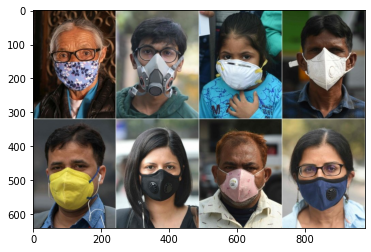

In [ ]:
#testing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('/content/data_with_masks/withMask1.jpg')
plt.imshow(im)
plt.show()

**Connect the Colab notebook to Google Drive**

In [ ]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# List the content of your local computer folder 
!ls -la "/content/gdrive/My Drive/CS 4641/Implementation/darknet"

ls: cannot access '/content/gdrive/My Drive/CS 4641/Implementation/darknet': No such file or directory


In [ ]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (144 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 144793 files and directories currently install

In [ ]:
!tree /content/gdrive/My\ Drive/CS\ 4641/Implementation/darknet/

/content/gdrive/My Drive/CS 4641/Implementation/darknet/
├── bin
│   └── darknet
│       └── darknet
└── cuDNN
    └── cudnn-10.0-linux-x64-v7.5.0.56.tgz

3 directories, 2 files


**Helpful defs**

In [ ]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

**Pixel normalization and Image compression with PCA**


In [ ]:
# pixel normalization
from numpy import asarray
from PIL import Image

def scale_pixel(image): 
  pixels = asarray(image)
  mean, std = pixels.mean(), pixels.std()
  
  min = pixels.min()
  max = pixels.max() 
  
  pixels = pixels.astype('float32')
  pixels = np.array((pixels - np.min(pixels)) / (np.max(pixels) - np.min(pixels)))
  np.where(pixels < 0, 0, pixels)
  np.where(pixels > 1, 1, pixels)
  pixels = pixels.astype('float32')

  return pixels

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

class ImgCompression(object):
    def __init__(self):
        pass

    def svd(self, X): 
        if (len(X.shape)==2):
            np_x = np.array(X)
            U, S, V = np.linalg.svd(np_x)
        else:
            X_reshape = X.transpose(2,0,1)
            N = X.shape[0]
            D = X.shape[1]
            U = []
            S = []
            V = []
            for i in range(3):
                np_x = np.array(X_reshape[i])
                Ui, Si, Vi = np.linalg.svd(np_x)
                U.append(Ui)
                S.append(Si)
                V.append(Vi)
            U = np.array(U).transpose(1,2,0)
            S = np.array(S).transpose(1,0)
            V = np.array(V).transpose(1,2,0)
        return U, S, V

    def rebuild_svd(self, U, S, V, k):
        if U.ndim == 2:
            U = U[:, :k]
            S = S[:k]
            V = V[:k, :]

            SV = np.matmul(np.diag(S), V)
            Xrebuild = np.matmul(U, SV)
        else:
            Xrebuild = np.zeros((U.shape[0], V.shape[0], 3))

            for i in range(3):
                SV = np.matmul(np.diag(S[:k, i]), V[:k, :, i])
                Xrebuild[:, :, i] = np.matmul(U[:, :k, i], SV)

        return Xrebuild

    def compression_ratio(self, X, k): 
        if (len(X.shape) == 2):
            image_size = X.shape[1]*X.shape[0]
            compressed_size = k*(X.shape[1]+X.shape[0]+1)
        else:
            image_size = X.shape[1]*X.shape[0]*3
            compressed_size = k*(X.shape[1]+X.shape[0]+1)*3
        return compressed_size/image_size


    def recovered_variance_proportion(self, S, k): 
        N = S.shape[0]
        if (len(S.shape) == 1):
            S_k = S[:k]
            S_k_sq = np.square(S_k)
            sum_S_k = np.sum(S_k_sq)/N
            S_sq = np.square(S)
            sum_S = np.sum(S_sq)/N
            return sum_S_k/sum_S
        else:
            S_t = S.transpose()
            S_t_k = S_t[:,:k]
            S_t_k_sq = np.square(S_t_k)
            sum_S_k = np.sum(S_t_k_sq, axis=1)/N
            sum_S = np.sum(np.square(S_t), axis=1)/N
            return np.divide(sum_S_k, sum_S).transpose()

In [ ]:
import os, os.path
import cv2
imgs = []
path = "/content/data_with_masks/"
valid_images = [".jpg",".jpeg",".png",".img"]
i = 1
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

    image = plt.imread(path +"/" +f)
    #plot image
    fig = plt.figure(figsize=(10,10))
    
    #implementation
    imcompression = ImgCompression()
    U, S, V = imcompression.svd(image)
    component_num = [1,2,5,10,20,40,80]
    k = 20
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    img_rebuild = scale_pixel(img_rebuild)
    
    c = np.around(imcompression.compression_ratio(image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)

    curr_directory = r'/content'
    # Image directory 
    directory = r'/content/data_with_masks_compressed'
      
    # Change to specified directory  
    os.chdir(directory) 
      
    # Filename 
    filename = 'data_with_mask-' + str(i) + '-compressed.jpg'
      
    # Saving the image 
    plt.imsave(filename, img_rebuild)
    print("saved")
    i = i+1
    del image
    del img_rebuild

In [ ]:
from PIL import Image
import os, os.path

imgs = []
path = "/content/data_with_masks"
valid_images = [".jpg",".jpeg",".png",".img"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

    image = plt.imread(path +"/" +f)/255.
    #plot image
    fig = plt.figure(figsize=(10,10))

    #compressing img
    imcompression = ImgCompression()
    U, S, V = imcompression.svd(image)
    component_num = [1,2,5,10,20,40,80]

    fig = plt.figure(figsize=(18, 18))

    i=0
    for k in component_num:
        img_rebuild = imcompression.rebuild_svd(U, S, V, k)
        c = np.around(imcompression.compression_ratio(image, k), 4)
        r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
        ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(img_rebuild)
        ax.set_title(f"{k} Components")
        ax.set_xlabel(f"Compression: {np.around(c,4)},\nRecovered Variance:  R: {r[0]}  G: {r[1]}  B: {r[2]}")
        i = i+1

In [ ]:
%cd ..
%mkdir data_with_masks_compressed

In [ ]:
from google.colab import files
!zip -r /content/data_with_masks_compressed.zip /content/data_with_masks_compressed/
files.download("/content/data_with_masks_compressed.zip")

In [ ]:
#print image
plt.figure()
plt.imshow(pixels, interpolation='none')

plt.figure()
plt.imshow(image, interpolation='none')

**Implmenting HSV QUANTIZATION**

In [ ]:
import numpy as np
import imageio
from skimage.color import rgb2hsv, hsv2rgb
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def quantize_hsv(img: np.ndarray, k: int) -> np.ndarray:
    width, height, dim = tuple(img.shape)

    hsvImg = rgb2hsv(img)
    reshaped = np.reshape(hsvImg[:, :, 0], (-1, 1))

    clustering = KMeans(n_clusters = k, random_state = 101).fit(reshaped)
    
    centers = clustering.cluster_centers_
    labels = clustering.predict(reshaped)
    
    quantized_img = hsvImg
    quantized_img[:, :, 0] = np.reshape(centers[labels], (hsvImg[:, :, 0].shape))
    
    quantized_img = (np.floor(hsv2rgb(quantized_img) * 255)).astype(np.uint8)
    
    return quantized_img

img = imageio.imread('./data_raw/004f.jpeg')
plt.imshow(quantize_hsv(img, 4))

In [ ]:
import cv2
imgs = []
path = "/content/data_with_masks_compressed/"
valid_images = [".jpg",".jpeg",".png",".img"]
i = 1
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

    image = plt.imread(path +"/" +f)
    #plot image
    fig = plt.figure(figsize=(10,10))
    
    #implementation
    k = 20
    quantized_img_hsv = quantize_hsv(image, k)

    curr_directory = r'/content'
    # Image directory 
    directory = r'/content/data_with_masks_compressed'
      
    # Change to specified directory  
    os.chdir(directory) 
      
    # Filename 
    filename = 'data_with_mask-' + str(i) + '-compressed.jpg'
      
    # Saving the image 
    plt.imsave(filename, img_rebuild)
    print("saved")

    i = i+1
    del image
    del img_rebuild

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 


inertias = [] 
K = range(1,10) 

X = imageio.imread('./data_raw/010-wuhan-coronavirus_1024.jpg')

X = X[:,:,0]

for k in K: 
  hsvImg = rgb2hsv(img)
  kmeanModel = KMeans(n_clusters=k).fit(X) 
  kmeanModel.fit(X)	 
  inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [ ]:
def get_hue_histograms(img: np.ndarray, k: int) -> Tuple[np.ndarray, np.ndarray]:
    hist_equal = np.zeros((k,), dtype=np.int64)
    hist_clustered = np.zeros((k,), dtype=np.int64)

    hsvImg = rgb2hsv(img)

    reshaped = np.reshape(hsvImg[:, :, 0], (-1, 1))
    hist_equal = np.histogram(reshaped, bins= k)[0]
    
    clustering = KMeans(n_clusters = k, random_state = 101).fit(reshaped)
    labels = clustering.predict(reshaped)

    hist_clustered = np.histogram(labels, bins= k)[0]
    
    return hist_equal, hist_clustered

In [ ]:
img = imageio.imread('./data_raw/004f.jpeg')
k = 20
hist_equal, hist_clustered = get_hue_histograms(img, k)
fig, axs = plt.subplots(1, 2)

axs.set_title("Histograms K=20 Image")
axs[0].set_title("equal")
axs[0].bar(np.arange(k), hist_equal)

axs[1].set_title("clustered")
axs[1].bar(np.arange(k), hist_clustered)

**Making Testing and Training Set**

In [ ]:
import os, os.path
import cv2
from matplotlib.image import imread
from numpy import asarray
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

imgs = []
path = "/content/test_data"
valid_images = [".jpg",".jpeg",".png",".img"]
i = 1
y_test = [] 
x_test = [] 

index = 0 
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue

    if f == "^mixed" or "^withoutMask":
      imgs.append(Image.open(os.path.join(path,f)))

      image = plt.imread(path +"/" +f)
      #print(type(image))
      fig = plt.figure(figsize=(10,10))

      #append zeros to y_train
      y_test.append(0)
      x_test.append(image)

    elif f == "^withMask":
      imgs.append(Image.open(os.path.join(path,f)))

      image = plt.imread(path +"/" +f)
      #print(type(image))
      fig = plt.figure(figsize=(10,10))

      #append ones to y_train
      y_test.append(1)
      x_test.append(image)
      #print(y_test)

#print(len(x_test[0]))
y_test = np.asarray(y_test, dtype = np.float32)
x_test = np.asarray(x_test, dtype = np.float32)
#print(x_test.shape)

In [ ]:
import glob, os

dataset_path = '/content/data_with_masks_compressed'

# Percentage of images to be used for the test set
percentage_test = 30;

# Create and/or truncate train.txt and test.txt
file_train = open('train_images.txt', 'w')  
file_test = open('test_images.txt', 'w')

# Populate train.txt and test.txt
counter = 1  
index_test = round(100 / percentage_test)  
for pathAndFilename in glob.iglob(os.path.join(dataset_path, "*.jpg")):  
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))

    if counter == index_test+1:
        counter = 1
        file_test.write(dataset_path + "/" + title + '.jpg' + "\n")
    else:
        file_train.write(dataset_path + "/" + title + '.jpg' + "\n")
        counter = counter + 1

In [ ]:
import os, os.path
import cv2
from matplotlib.image import imread

imgs = []
path = "/content/train_data"
valid_images = [".jpg",".jpeg",".png",".img"]
i = 1
y_train = [] 
x_train = [] 
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue

    if f == "mixed+" or "withoutMask+":
      imgs.append(Image.open(os.path.join(path,f)))
      image = plt.imread(path +"/" +f,0)
      fig = plt.figure(figsize=(10,10))

      #append zeros to y_train
      y_train.append(0)
      x_train.append(image)

    elif f == "withMask+":
      imgs.append(Image.open(os.path.join(path,f)))
      image = plt.imread(path +"/" +f,0)
      #print(type(image))
      fig = plt.figure(figsize=(10,10))

      #append zeros to y_train
      y_train.append(1)
      x_train.append(image)
y_train = np.array(y_train, dtype = np.float32)
x_train = np.array(x_train, dtype = np.float32)

In [ ]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)                               
print(y_test.shape)